In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np

In [3]:
from utils.utils import load_data

FOLDER_PATH = "sentiment_datasets/projekt2_data"

data_df = load_data(FOLDER_PATH, df_delimiter=",")
data_df.head(10)

,SentenceId,Phrase,Sentiment,df_
0,8068,feminist conspiracy theorist,2,2
1,8068,conspiracy theorist,2,2
2,8068,theorist,2,2
3,8068,named dirty dick,2,2
4,8068,dirty dick,2,2
5,8069,"the aaa of action, xxx is a blast of adrenalin...",4,2
6,8069,the aaa of action,3,2
7,8069,the aaa,2,2
8,8069,aaa,2,2
9,8069,", xxx is a blast of adrenalin, rated eee for e...",4,2


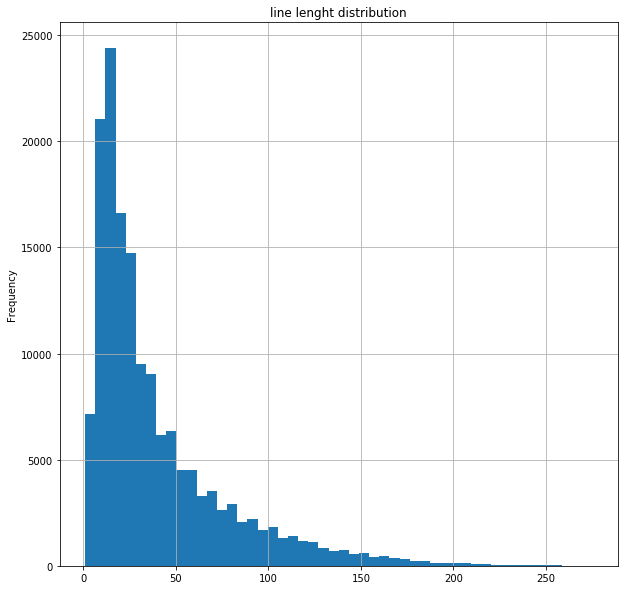

In [4]:
data_df["Phrase"].str.len().plot(kind="hist", title="line lenght distribution", grid=True, figsize=(10,10), bins=50);

# Word Level

In [5]:
from preprocess_data.preprocess_data import preprocess_data_word_tokenizer
from architecture.models import model_rnn, model_cnn
from utils.utils_result import save_report, update_fit_params, evaluation

W0529 15:11:46.878389 140277112809280 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


In [6]:
# preprocess data
(x_train, y_train), (x_val, y_val), (x_test, y_test), int2word = preprocess_data_word_tokenizer(data_df, x_label="Phrase", y_label="Sentiment", max_len_seq=None)

In [7]:
# general parameter setting
tensorboard_params = {
    "histogram_freq": 1,
    "write_graph": True,
    "write_images": True
}

fit_params = {
    "x": x_train,
    "y": y_train,
    "epochs": 50,
    "batch_size": 64,
    "validation_data": (x_val, y_val) 
}

input_params = {
    "shape": x_train.shape[1:],
    "dtype": x_train.dtype
}

test_result_dict = {}

In [8]:
VOCAB_SIZE = len(int2word)
MAX_LEN_SEQ = x_train.shape[1]
EMB_OUTPUT_DIM = min(50, VOCAB_SIZE)

## RNN

In [9]:
# parameters setting
rnn_params = {
    "input_dim": VOCAB_SIZE,
    "output_dim": EMB_OUTPUT_DIM,
    "input_length": MAX_LEN_SEQ,
    "trainable": True
}

model_params_rnn = {
    "input_layer": "simple_input",
    "emb_layer": "Embedding",
    "input_params": input_params,
    "emb_params": rnn_params,
    "out_activation": "softmax",
    "out_units": np.unique(y_train).shape[0],
    "loss": "sparse_categorical_crossentropy",
    "optimizer": "adam"
}
model_name = "model_rnn"
model_rnn_word = model_rnn(model_params_rnn)
fit_params, markered_path = update_fit_params(fit_params, model_name=model_name, tensorboard_params=tensorboard_params)

Instructions for updating:
Colocations handled automatically by placer.


W0529 15:11:54.057039 140277112809280 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/resource_variable_ops.py:435: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


W0529 15:11:54.071198 140277112809280 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/layers/core.py:143: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Train on 139999 samples, validate on 7800 samples
Instructions for updating:
Use tf.cast instead.


W0529 15:12:04.644960 140277112809280 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


W0529 15:12:04.744219 140277112809280 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:102: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


Epoch 1/50
139999/139999 [==============================] - 83s 591us/sample - loss: 1.0086 - acc: 0.5935 - val_loss: 1.0204 - val_acc: 0.5932
Epoch 2/50
139999/139999 [==============================] - 83s 594us/sample - loss: 0.8324 - acc: 0.6569 - val_loss: 1.0022 - val_acc: 0.6033
Epoch 3/50
139999/139999 [==============================] - 81s 577us/sample - loss: 0.7806 - acc: 0.6753 - val_loss: 1.0179 - val_acc: 0.6042
Epoch 4/50
139999/139999 [==============================] - 79s 567us/sample - loss: 0.7486 - acc: 0.6875 - val_loss: 1.0142 - val_acc: 0.6029
Epoch 5/50
139999/139999 [==============================] - 79s 563us/sample - loss: 0.7260 - acc: 0.6966 - val_loss: 1.0231 - val_acc: 0.6024
Epoch 6/50
139999/139999 [==============================] - 79s 564us/sample - loss: 0.7080 - acc: 0.7018 - val_loss: 1.0215 - val_acc: 0.6032
Epoch 7/50
139999/139999 [==============================] - 80s 568us/sample - loss: 0.6913 - acc: 0.7107 - val_loss: 1.0255 - val_acc: 0.6055

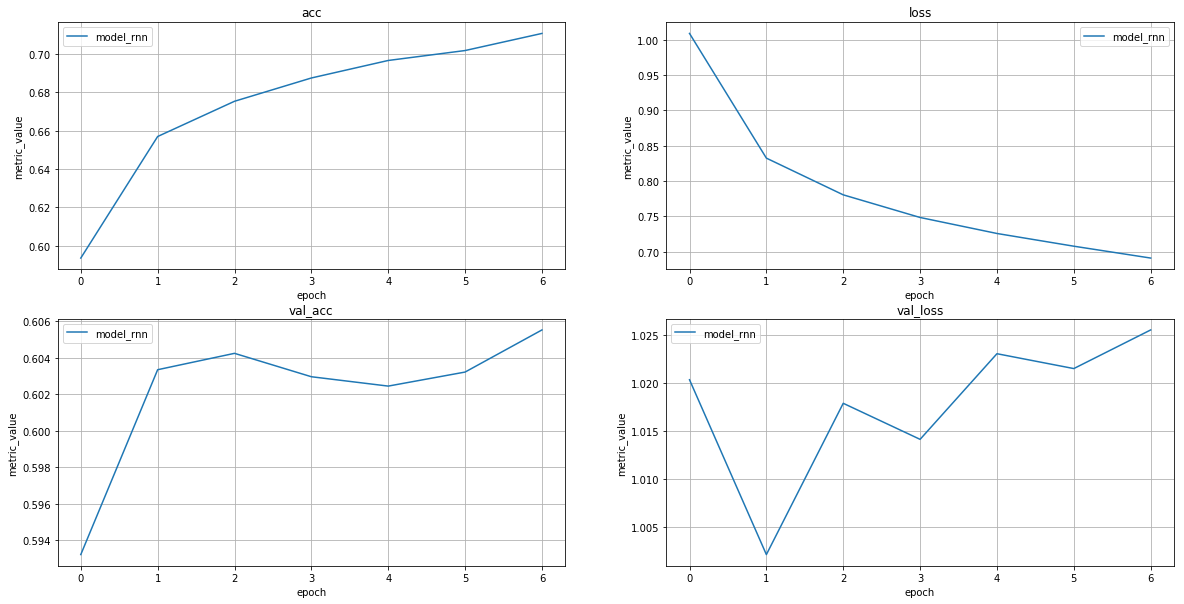

In [10]:
# training
model_rnn_word.fit(**fit_params);
model_rnn_word = save_report(model_rnn_word, model_name=model_name, markered_path=markered_path)

In [11]:
# evaluation
test_result_dict = evaluation(model=model_rnn_word, x_test=x_test, y_test=y_test, model_name=model_name, test_result_dict=test_result_dict)

Wynik na zbiorze testowym modelu model_rnn, to 0.3789


## CNN

In [12]:
# parameters setting
cnn_params = {
    "input_dim": VOCAB_SIZE,
    "output_dim": EMB_OUTPUT_DIM,
    "input_length": MAX_LEN_SEQ,
    "trainable": True
}

model_params_cnn = {
    "input_layer": "simple_input",
    "emb_layer": "Embedding",
    "input_params": input_params,
    "emb_params": cnn_params,
    "out_activation": "softmax",
    "out_units": np.unique(y_train).shape[0],
    "loss": "sparse_categorical_crossentropy",
    "optimizer": "adam"
}
model_name = "model_cnn"
model_cnn_word = model_cnn(model_params_cnn)
fit_params, markered_path = update_fit_params(fit_params, model_name=model_name, tensorboard_params=tensorboard_params)

Train on 139999 samples, validate on 7800 samples
Epoch 1/50
139999/139999 [==============================] - 37s 265us/sample - loss: 0.9993 - acc: 0.6013 - val_loss: 1.0041 - val_acc: 0.5987
Epoch 2/50
139999/139999 [==============================] - 37s 263us/sample - loss: 0.8041 - acc: 0.6745 - val_loss: 1.0166 - val_acc: 0.6026
Epoch 3/50
139999/139999 [==============================] - 37s 262us/sample - loss: 0.7451 - acc: 0.6953 - val_loss: 1.0174 - val_acc: 0.6013
Epoch 4/50
139999/139999 [==============================] - 37s 262us/sample - loss: 0.7058 - acc: 0.7099 - val_loss: 1.0288 - val_acc: 0.6022
Epoch 5/50
139999/139999 [==============================] - 37s 263us/sample - loss: 0.6770 - acc: 0.7187 - val_loss: 1.0830 - val_acc: 0.6022
Epoch 6/50
139999/139999 [==============================] - 37s 261us/sample - loss: 0.6536 - acc: 0.7275 - val_loss: 1.0866 - val_acc: 0.5953


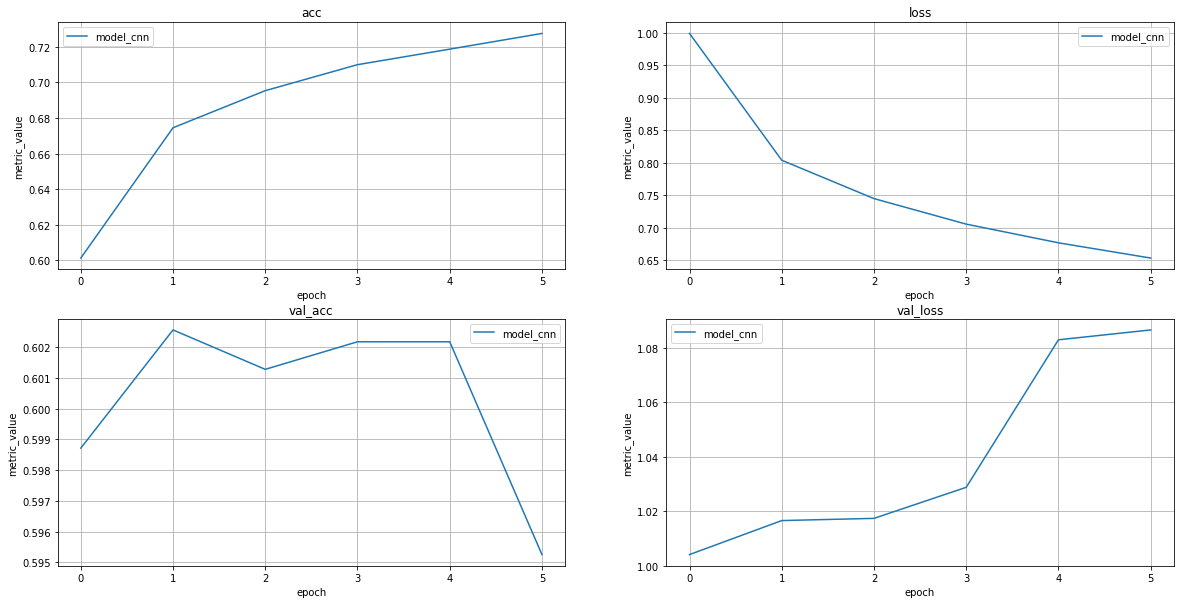

In [13]:
# training
model_cnn_word.fit(**fit_params);
model_cnn_word = save_report(model=model_cnn_word, model_name=model_name, markered_path=markered_path)

In [14]:
# evaluation
test_result_dict = evaluation(model=model_cnn_word, x_test=x_test, y_test=y_test, model_name=model_name, test_result_dict=test_result_dict)

Wynik na zbiorze testowym modelu model_cnn, to 0.3612


# Results

In [15]:
test_result_dict

{'model_rnn': 0.37893484549638395, 'model_cnn': 0.3611989809335963}

In [16]:
from utils.utils_result import update_common_history_folder, display_results

In [ ]:
update_common_history_folder("about_model")
display_results("about_models/comparision")